In [ ]:
!pip install split-folders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data_dir = '../input/brain-tumor-classification-mri'
batch_size=32
image_size=224

In [ ]:
splitfolders.ratio(data_dir+ "/Training", output='brain-tumor-classification-mri', ratio=(0.9008,0.0992))

Copying files: 2870 files [00:13, 206.08 files/s]


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "./brain-tumor-classification-mri/train",
  shuffle=True,
  image_size=(image_size, image_size),
  batch_size=batch_size
)

Found 2583 files belonging to 4 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "./brain-tumor-classification-mri/val",
  shuffle=False,
  image_size=(image_size, image_size),
  batch_size=batch_size
)

Found 287 files belonging to 4 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "/Testing",
  shuffle=False,
  image_size=(image_size, image_size),
  batch_size=batch_size
)

Found 394 files belonging to 4 classes.


In [ ]:
class_names = test_ds.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
def my_tf_round(x, decimals = 0):
    multiplier = tf.constant(10**decimals, dtype=x.dtype)
    return tf.round(x * multiplier) / multiplier

In [ ]:
normalization_layer1 = tf.keras.layers.Rescaling(1./255)
normalization_layer2 =  layer = tf.keras.layers.Normalization(mean=[0.5, 0.5, 0.5], 
                      variance=[np.square(0.5), 
                                np.square(0.5), 
                                np.square(0.5)])

2022-04-01 23:34:31.738781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


-1.0 0.899


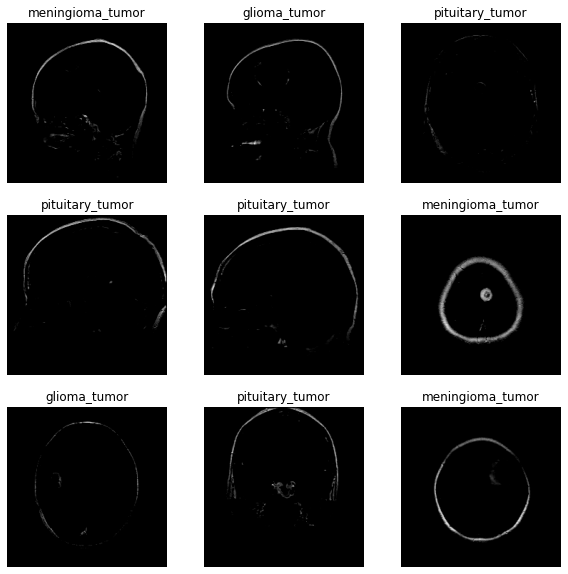

In [ ]:
train_ds_normalized = train_ds.map(lambda x, y: (my_tf_round(normalization_layer2(normalization_layer1(x)),4) , y))
image_batch, labels_batch = next(iter(train_ds_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
plt.figure(figsize=(10, 10))
for images, labels in train_ds_normalized.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("off")

-1.0 0.899


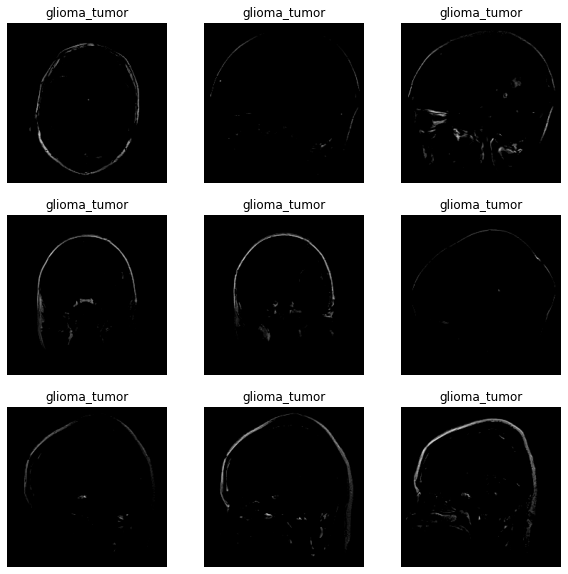

In [ ]:
val_ds_normalized = val_ds.map(lambda x, y: (my_tf_round(normalization_layer2(normalization_layer1(x)),4) , y))
image_batch, labels_batch = next(iter(val_ds_normalized))

print(np.min(first_image), np.max(first_image))
plt.figure(figsize=(10, 10))
for images, labels in val_ds_normalized.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("off")

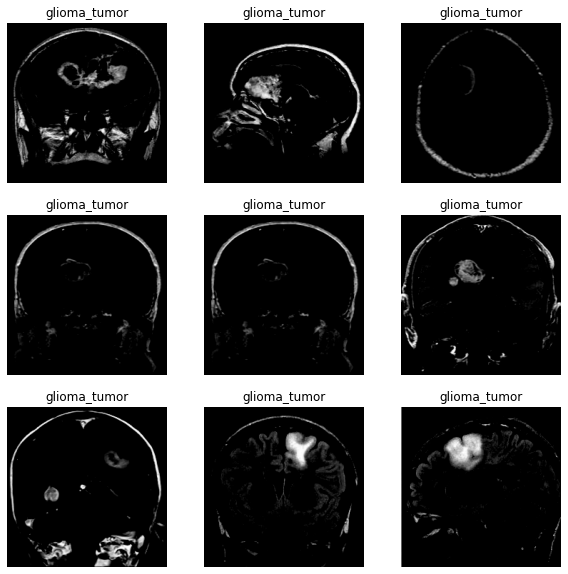

In [ ]:
test_ds_normalized = test_ds.map(lambda x, y: (my_tf_round(normalization_layer2(normalization_layer1(x)),4) , y))
image_batch, labels_batch = next(iter(test_ds_normalized))
plt.figure(figsize=(10, 10))
for images, labels in test_ds_normalized.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
y_test = [label for images, labels in test_ds_normalized for label in labels.numpy()]

In [ ]:
def display_report_and_matrix(y_pred, model):
    print(f'Test {model} Tensorflow and Keras')
   
    y_prediction = np.argmax(y_pred,axis=1)
    report = classification_report(y_test, y_prediction, target_names=class_names)
    print(f'{report}')

    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.set_title(f'Confusion Matrix {model} Tensorflow and Keras')
    cm = confusion_matrix(y_test,y_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    disp.plot(cmap='Blues', ax=ax)

In [ ]:
def display_plot(history, model):
    plt.figure(figsize=(14, 8))
    tab_plot = [{
                  "id": 1,
                  "variables":['accuracy', 'val_accuracy'],
                  "labels":['Training Accuracy', 'Validation Accuracy'],
                  "legend":'lower right',
                  "title":f'Accuracy Tensorflow and Keras - {model}',
                  "ylabel":'Accuracy'
              },{ 
                  "id": 2,
                  "variables":['loss', 'val_loss'],
                  "labels":['Training Loss', 'Validation Loss'],
                  "legend":'upper right',
                  "title":f'Loss Tensorflow and Keras - {model}',
                  "ylabel":'Loss'
              }]
    epochs_range = range(25)
    for tab in tab_plot: 
          plt.subplot(1, 2, tab['id'])
          plt.plot(epochs_range, history.history[tab['variables'][0]], label=tab['labels'][0], marker='o', markerfacecolor='green',color='green')
          plt.plot(epochs_range, history.history[tab['variables'][1]], label=tab['labels'][1], marker='o', markerfacecolor='blue',color='blue')
          plt.legend(loc=tab['legend'])
          plt.title(tab['title'])
          plt.xlabel('Epochs')
          plt.ylabel(tab['ylabel'])
    plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2 
model =  MobileNetV2(weights=None,include_top=True,input_shape=(image_size,image_size,3),alpha=1, classifier_activation='softmax',classes=4)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
print('Train Mobilenetv2 Tensorflow and Keras')
history_mobilenet_v2 = model.fit(train_ds_normalized,  validation_data=(val_ds_normalized), epochs=25)

Train Mobilenetv2 Tensorflow and Keras
Epoch 1/25
81/81 [==============================] - 19s 180ms/step - loss: 1.0254 - accuracy: 0.5765 - val_loss: 1.3623 - val_accuracy: 0.2892
Epoch 2/25
81/81 [==============================] - 15s 178ms/step - loss: 0.6411 - accuracy: 0.7429 - val_loss: 1.4017 - val_accuracy: 0.2892
Epoch 3/25
81/81 [==============================] - 15s 177ms/step - loss: 0.4567 - accuracy: 0.8208 - val_loss: 1.8000 - val_accuracy: 0.2892
Epoch 4/25
81/81 [==============================] - 15s 176ms/step - loss: 0.3889 - accuracy: 0.8432 - val_loss: 2.2322 - val_accuracy: 0.2892
Epoch 5/25
81/81 [==============================] - 14s 172ms/step - loss: 0.3184 - accuracy: 0.8769 - val_loss: 2.7636 - val_accuracy: 0.2892
Epoch 6/25
81/81 [==============================] - 15s 177ms/step - loss: 0.2314 - accuracy: 0.9152 - val_loss: 3.7592 - val_accuracy: 0.2892
Epoch 7/25
81/81 [==============================] - 15s 177ms/step - loss: 0.1668 - accuracy: 0.9419 - 

Test Mobilenetv2 Tensorflow and Keras
                  precision    recall  f1-score   support

    glioma_tumor       0.00      0.00      0.00       100
meningioma_tumor       0.00      0.00      0.00       115
        no_tumor       0.00      0.00      0.00       105
 pituitary_tumor       0.19      1.00      0.32        74

        accuracy                           0.19       394
       macro avg       0.05      0.25      0.08       394
    weighted avg       0.04      0.19      0.06       394



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


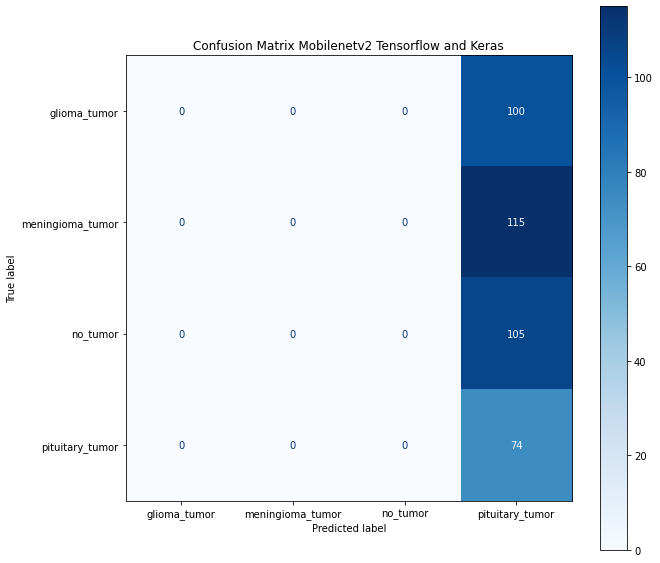

In [ ]:
y_pred_mobilenet_v2 = model.predict(test_ds_normalized)
display_report_and_matrix(y_pred_mobilenet_v2, 'Mobilenetv2')

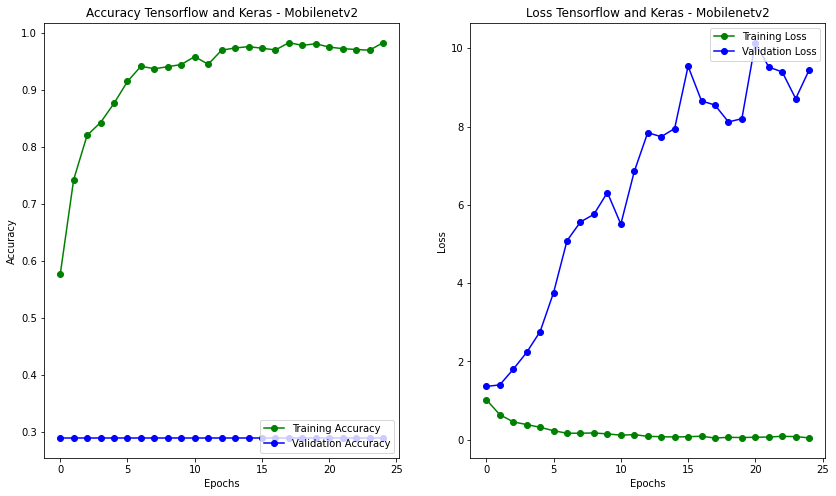

In [ ]:
display_plot(history_mobilenet_v2, 'Mobilenetv2')

In [ ]:
from tensorflow.keras.applications import DenseNet121 
model_densenet = DenseNet121(weights=None,include_top=True,input_shape=(image_size,image_size,3),classes=4)

In [ ]:
model_densenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
print('Train DenseNet121 Tensorflow and Keras')
history_densenet = model_densenet.fit(train_ds_normalized, validation_data=val_ds_normalized, epochs=25)

Train DenseNet121 Tensorflow and Keras
Epoch 1/25
81/81 [==============================] - 29s 233ms/step - loss: 0.8545 - accuracy: 0.6500 - val_loss: 1.9404 - val_accuracy: 0.4007
Epoch 2/25
81/81 [==============================] - 18s 215ms/step - loss: 0.6419 - accuracy: 0.7305 - val_loss: 1.3039 - val_accuracy: 0.5436
Epoch 3/25
81/81 [==============================] - 18s 216ms/step - loss: 0.5147 - accuracy: 0.7944 - val_loss: 2.2223 - val_accuracy: 0.3659
Epoch 4/25
81/81 [==============================] - 18s 213ms/step - loss: 0.4719 - accuracy: 0.8177 - val_loss: 12.9193 - val_accuracy: 0.1463
Epoch 5/25
81/81 [==============================] - 18s 216ms/step - loss: 0.3747 - accuracy: 0.8571 - val_loss: 9.2076 - val_accuracy: 0.2753
Epoch 6/25
81/81 [==============================] - 18s 213ms/step - loss: 0.2979 - accuracy: 0.8839 - val_loss: 7.8564 - val_accuracy: 0.2369
Epoch 7/25
81/81 [==============================] - 18s 219ms/step - loss: 0.2725 - accuracy: 0.8993 -

Test DenseNet121 Tensorflow and Keras
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.18      0.30       100
meningioma_tumor       0.61      0.97      0.75       115
        no_tumor       0.75      0.95      0.84       105
 pituitary_tumor       0.82      0.64      0.72        74

        accuracy                           0.70       394
       macro avg       0.78      0.69      0.65       394
    weighted avg       0.77      0.70      0.65       394



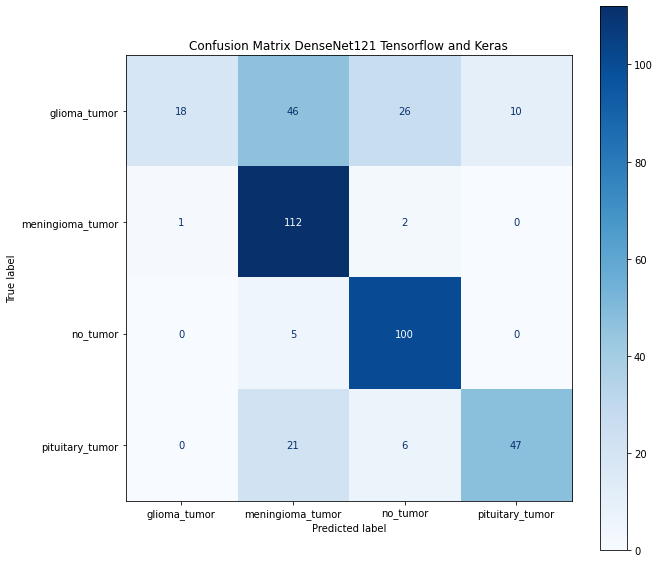

In [ ]:
y_pred_densenet = model_densenet.predict(test_ds_normalized)
display_report_and_matrix(y_pred_densenet, 'DenseNet121')

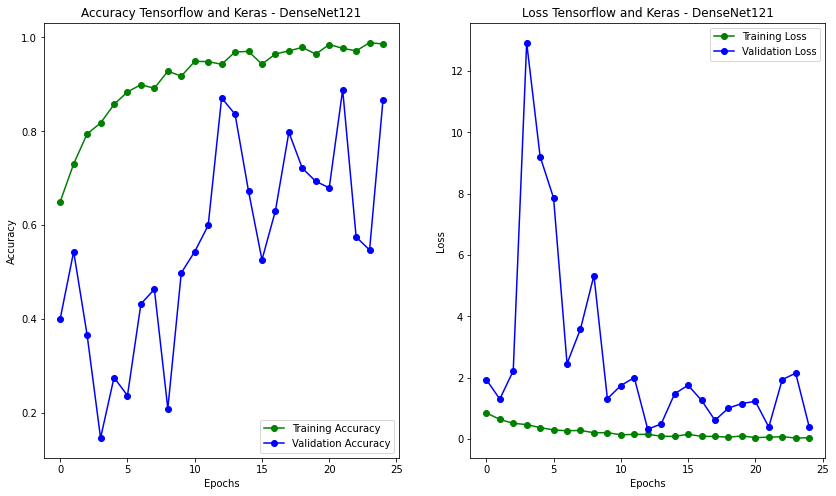

In [ ]:
display_plot(history_densenet, 'DenseNet121')

In [ ]:
from tensorflow.keras.applications import ResNet50
model_resnet50 =  ResNet50(weights=None,include_top=True,input_shape=(image_size,image_size,3), classifier_activation='softmax',classes=4)

In [ ]:
model_resnet50.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
print('Train Resnet50 Tensorflow and Keras')
history_resnet50 = model_resnet50.fit(train_ds_normalized, validation_data=val_ds_normalized, epochs=25)

Train Resnet50 Tensorflow and Keras
Epoch 1/25
81/81 [==============================] - 22s 207ms/step - loss: 1.1839 - accuracy: 0.6117 - val_loss: 3.1146 - val_accuracy: 0.2857
Epoch 2/25
81/81 [==============================] - 16s 191ms/step - loss: 0.8195 - accuracy: 0.7042 - val_loss: 1.4737 - val_accuracy: 0.3728
Epoch 3/25
81/81 [==============================] - 15s 184ms/step - loss: 0.6120 - accuracy: 0.7604 - val_loss: 2.5241 - val_accuracy: 0.1603
Epoch 4/25
81/81 [==============================] - 16s 187ms/step - loss: 0.5811 - accuracy: 0.8022 - val_loss: 2.6284 - val_accuracy: 0.3206
Epoch 5/25
81/81 [==============================] - 15s 185ms/step - loss: 0.3979 - accuracy: 0.8471 - val_loss: 1.4294 - val_accuracy: 0.5505
Epoch 6/25
81/81 [==============================] - 16s 187ms/step - loss: 0.3408 - accuracy: 0.8657 - val_loss: 1.7933 - val_accuracy: 0.5889
Epoch 7/25
81/81 [==============================] - 15s 185ms/step - loss: 0.3265 - accuracy: 0.8757 - val

Test ResNet50 Tensorflow and Keras
                  precision    recall  f1-score   support

    glioma_tumor       0.68      0.23      0.34       100
meningioma_tumor       0.72      0.93      0.81       115
        no_tumor       0.69      0.99      0.81       105
 pituitary_tumor       0.95      0.77      0.85        74

        accuracy                           0.74       394
       macro avg       0.76      0.73      0.70       394
    weighted avg       0.74      0.74      0.70       394



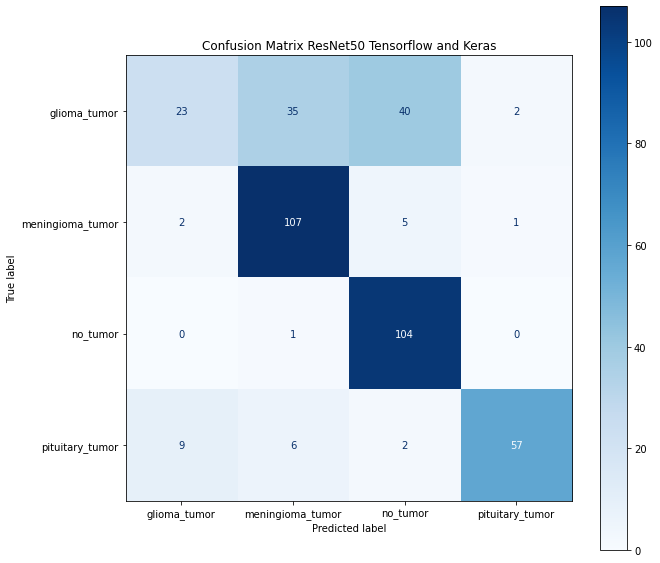

In [ ]:
y_pred_resnet50 = model_resnet50.predict(test_ds_normalized)
display_report_and_matrix(y_pred_resnet50, 'ResNet50')

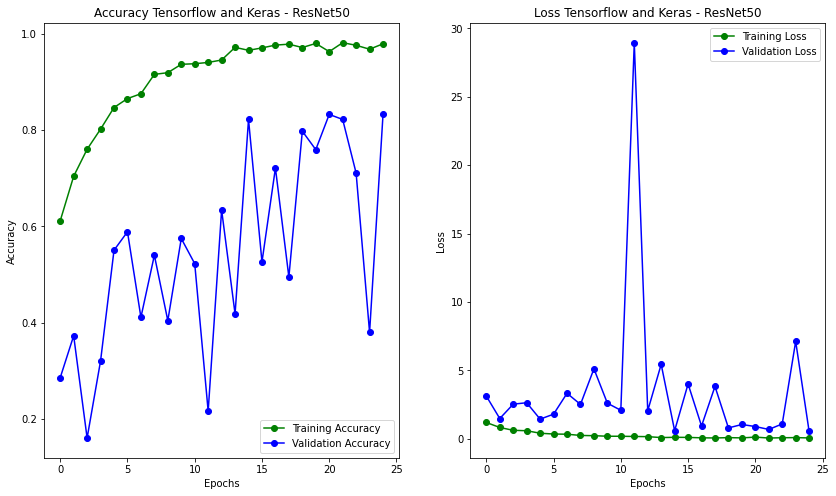

In [ ]:
display_plot(history_resnet50, 'ResNet50')